In [1]:
import pandas as pd
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Introduction-to-Python-for-machine-learning/files/7768140/FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding="latin-1")
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [2]:
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [7]:
#check for missing values
df.isnull().sum()


Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

1.What is the total Protein supply quantity in Madagascar in 2015?



In [8]:
total_protein_supply_Madagascar_2015 = df[(df['Area'] == 'Madagascar') & (df['Element'] == 'Protein supply quantity (g/capita/day)')]['Y2015'].sum()

print("Total Protein Supply Quantity in Madagascar in 2015:",round(total_protein_supply_Madagascar_2015, 2))

Total Protein Supply Quantity in Madagascar in 2015: 173.05


2. How would you check for the number of rows and columns in a pandas DataFrame named df?

In [9]:
df.shape


(60943, 12)

3. What would be the output for?

In [10]:
S = [['him', 'sell'], [90, 28, 43]]

S[0][1][1]

'e'

4. What is the total sum of Wine produced in 2015 and 2018 respectively?

In [11]:
total_wine_2015 = df[df['Item'] == 'Wine']['Y2015'].sum()
total_wine_2018 = df[df['Item'] == 'Wine']['Y2018'].sum()

print("Total Wine produced in 2015:",round(total_wine_2015,2))
print("Total Wine produced in 2018:", round(total_wine_2018,2))


Total Wine produced in 2015: 4251.81
Total Wine produced in 2018: 4039.32


5. Select columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’.  Which of these Areas had the 7th lowest sum in 2017?

In [12]:
area_sum_2017 = df.groupby('Area')['Y2017'].sum().sort_values()
seventh_lowest_sum_area = area_sum_2017.index[6]

print("Area with the 7th lowest sum in 2017:", seventh_lowest_sum_area)


Area with the 7th lowest sum in 2017: Guinea-Bissau


5a. Visua represntation of the query above

<ipython-input-5-6f8e57aad237>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_sum_2017.values, y=area_sum_2017.index, palette=colors)


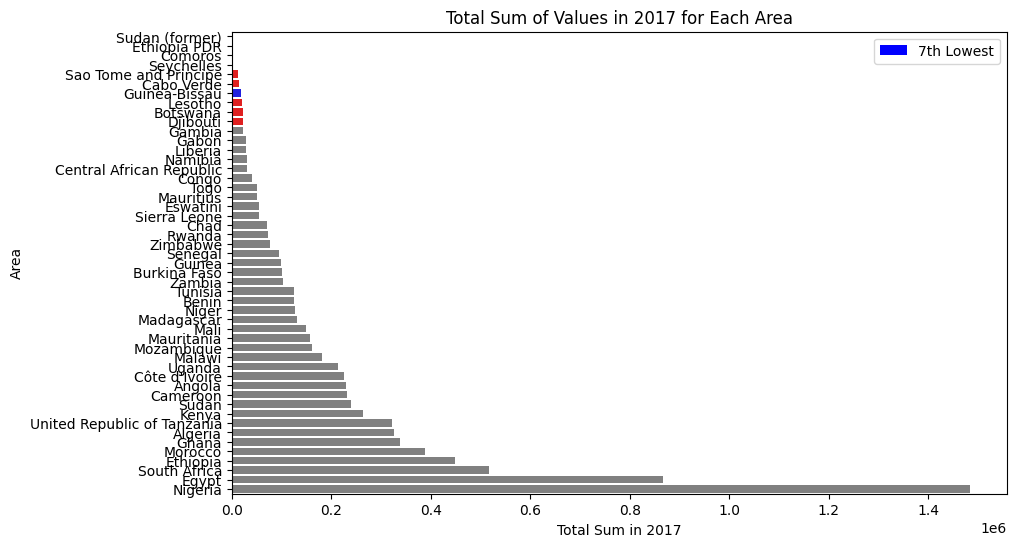

Area with the 7th lowest sum in 2017: Guinea-Bissau


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
# group the data by area and sum the values in 2017
area_sum_2017 = df.groupby('Area')['Y2017'].sum().sort_values()

# Get the 7th lowest sum area
seventh_lowest_sum_area = area_sum_2017.index[6]

# Create a bar plot for sum of values in 2017
plt.figure(figsize=(10, 6))
# Highlighting the lowest 10 areas
colors = ['red' if area in area_sum_2017.index[:10] else 'grey' for area in area_sum_2017.index]
# Emphasize the 7th lowest area
colors[area_sum_2017.index.tolist().index(seventh_lowest_sum_area)] = 'blue'
sns.barplot(x=area_sum_2017.values, y=area_sum_2017.index, palette=colors)
plt.xlabel('Total Sum in 2017')
plt.ylabel('Area')
plt.title('Total Sum of Values in 2017 for Each Area')

# Add legend-like label for the 7th position
legend_elements = [Patch(facecolor='blue', label='7th Lowest')]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

# Print the area with the 7th lowest sum in 2017
print("Area with the 7th lowest sum in 2017:", seventh_lowest_sum_area)



6.Which of these python data structures is unorderly?


**Set**

7. What is the mean and standard deviation across the whole dataset for the year 2017 to 2 decimal places?

In [16]:
# Extract values from the 'Y2017' column
values_2017 = df['Y2017']

# Calculate the mean and standard deviation
mean_2017 = round(values_2017.mean(), 2)
std_dev_2017 = round(values_2017.std(), 2)

# Print the mean and standard deviation
print("Mean for the year 2017:", mean_2017)
print("Standard Deviation for the year 2017:", std_dev_2017)


Mean for the year 2017: 140.92
Standard Deviation for the year 2017: 1671.86


8. Given the following python code, what would the output of the code give?


In [17]:
my_tuppy = (1,2,5,8)

my_tuppy[2] = 6



TypeError: 'tuple' object does not support item assignment

9. What is the total number and percentage of missing data in 2014 to 3 decimal places?

In [18]:
# Count the number of missing values in the 'Y2014' column
missing_data_2014 = df['Y2014'].isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the percentage of missing data
percentage_missing_2014 = (missing_data_2014 / total_rows) * 100

# Print the total number and percentage of missing data in 2014
print("Total number of missing data in 2014:", missing_data_2014)
print("Percentage of missing data in 2014:", round(percentage_missing_2014, 3), "%")


Total number of missing data in 2014: 1589
Percentage of missing data in 2014: 2.607 %


10. If you have the following list

  lst = [[35, 'Portugal', 94], [33, 'Argentina', 93], [30 , 'Brazil', 92]]

  col = [‘Age’,’Nationality’,’Overall’]

  How do you create a pandas DataFrame using this list, to look like the table below?

In [19]:
import pandas as pd

# Provided list and column names
lst = [[35, 'Portugal', 94], [33, 'Argentina', 93], [30, 'Brazil', 92]]
col = ['Age', 'Nationality', 'Overall']

# Create a pandas DataFrame(Answer)
df = pd.DataFrame(lst, columns=col, index = [1,2,3])

# Print the DataFrame
print(df)


   Age Nationality  Overall
1   35    Portugal       94
2   33   Argentina       93
3   30      Brazil       92


11.  Given the following numpy array

  array = (
          [[94, 89, 63],
          [93, 92, 48],
          [92, 94, 56]]
          
          )
  How would you select the elements in bold and italics from the array?

In [20]:
import numpy as np

# Given numpy array
array = np.array([[94, (89), (63)],
                  [93, (92), (48)],
                  [92, 94, 56]])

# Select the elements in parentheses using slicing (Answer)
elements_in_parentheses = array[:2, 1:]

# Print the selected elements
print(elements_in_parentheses)


[[89 63]
 [92 48]]


12. Which year had the least correlation with ‘Element Code’?

In [25]:
# Select the relevant columns
columns_of_interest = ['Element Code', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']
data = df[columns_of_interest]

# Calculate correlations, excluding missing values
correlations = data.corr(method='pearson')

# Get the correlation between 'Element Code' and each year
element_code_corr = correlations.loc['Element Code', 'Y2014':'Y2018']

# Find the year with the lowest correlation
least_correlated_year = element_code_corr.idxmin()

print("Year with the least correlation with 'Element Code':", least_correlated_year)



Year with the least correlation with 'Element Code': Y2016


* Correlation Heatmap


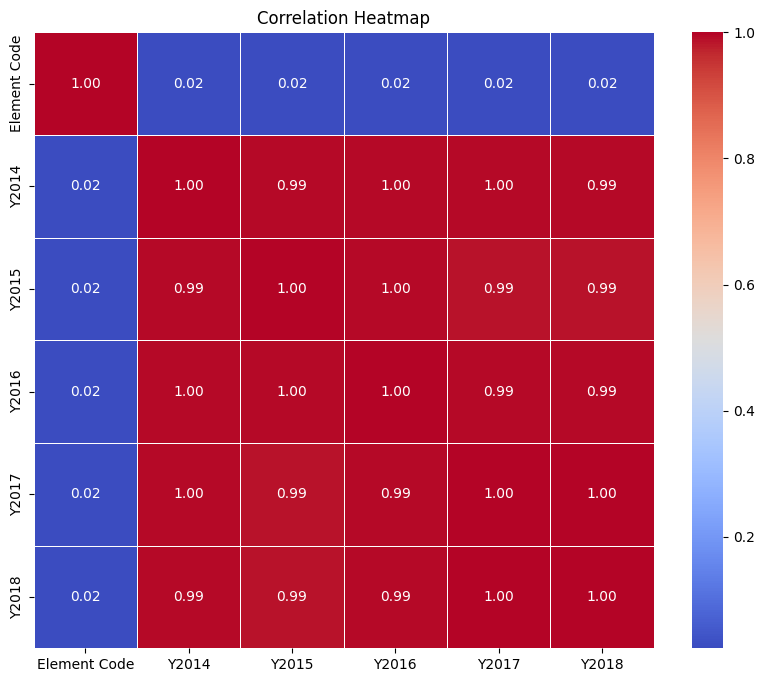

In [27]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df[['Element Code', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']].corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


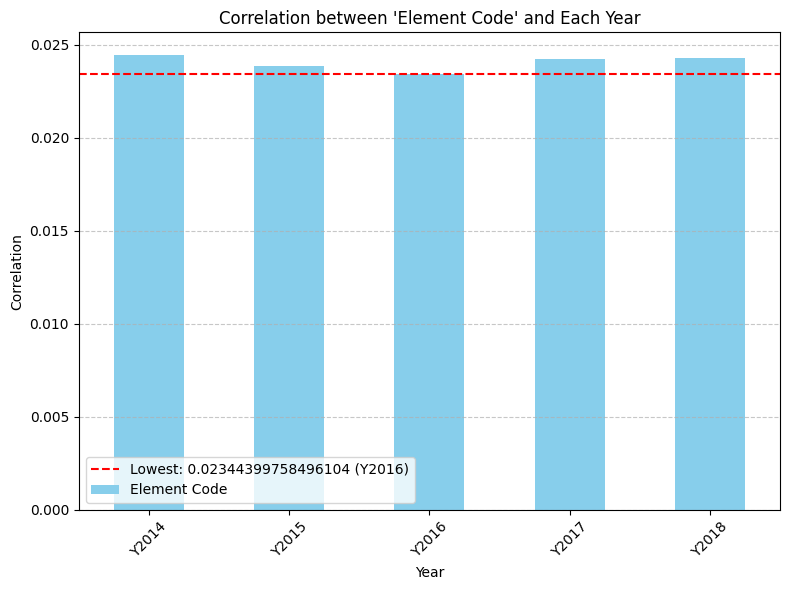

In [44]:
import matplotlib.pyplot as plt

# Plot the correlations
plt.figure(figsize=(8, 6))
bar_plot = element_code_corr.plot(kind='bar', color='skyblue')
plt.title("Correlation between 'Element Code' and Each Year")
plt.xlabel("Year")
plt.ylabel("Correlation")
plt.xticks(rotation=45)

# Apply grid lines to the lowest bars
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add indicator line for the lowest bar
lowest_corr = element_code_corr.min()
lowest_bar_index = element_code_corr.idxmin()
lowest_bar_height = element_code_corr.loc[lowest_bar_index]
plt.axhline(y=lowest_bar_height, color='red', linestyle='--', label=f'Lowest: {lowest_corr} ({lowest_bar_index})')

plt.legend()
plt.tight_layout()
plt.show()


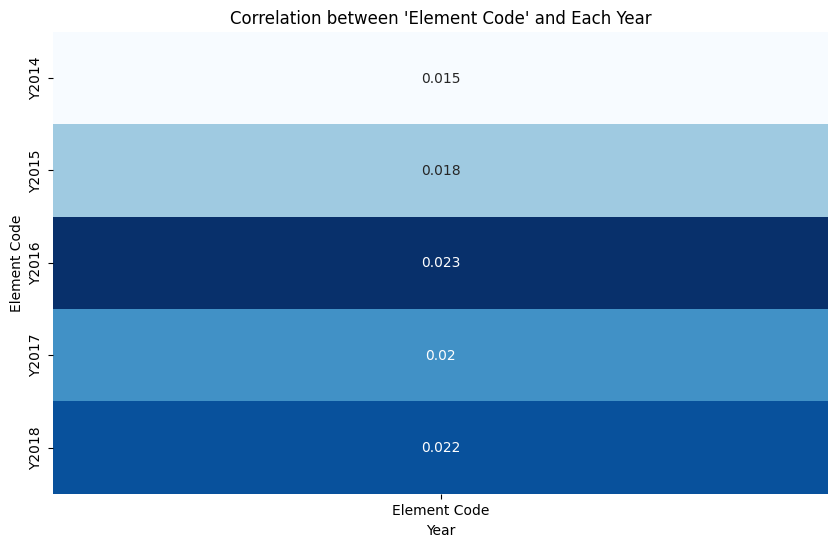

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with your actual data)
data = {
    'Year': ['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
    'Element Code': [0.015, 0.018, 0.023, 0.020, 0.022]
}

# Convert data to a pivot table for heatmap
heatmap_data = pd.pivot_table(pd.DataFrame(data), values='Element Code', index=['Year'])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Year')
plt.ylabel('Element Code')
plt.title("Correlation between 'Element Code' and Each Year")
plt.show()

In [29]:
# Compute the correlation between 'Element Code' and each year
element_code_corr = df[['Element Code', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']].corr().iloc[0, 1:]

# Find the least correlated year
least_corr_year = element_code_corr.idxmin()

print("The least correlated year with 'Element Code' is:", least_corr_year)
print("Correlation coefficient:", element_code_corr[least_corr_year])


The least correlated year with 'Element Code' is: Y2016
Correlation coefficient: 0.02344399758496104


**13**. Which of the following dataframe methods can be used to access elements across rows and columns?

** The correct options are:

- `df.iloc[ : ]`
- `df.loc( )`

In [30]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15]
}
df = pd.DataFrame(data)

# Using df.iloc
# Accessing the element in the 2nd row and 3rd column
element_iloc = df.iloc[1, 2]
print("Element at row 2, column 3 (using df.iloc):", element_iloc)

# Accessing elements using df.loc
# Accessing the element in the row labeled 2 and column labeled 'C'
element_loc = df.loc[1, 'C']
print("Element at row labeled 2, column labeled 'C' (using df.loc):", element_loc)


Element at row 2, column 3 (using df.iloc): 12
Element at row labeled 2, column labeled 'C' (using df.loc): 12


14.  Consider the following list of tuples:

  y = [(2, 4), (7, 8), (1, 5, 9)]

  How would you assign element 8 from the list to a variable x?


In [31]:
# Given list of tuples
y = [(2, 4), (7, 8), (1, 5, 9)]

# Assigning element 8 to variable x(Answer)
x = y[1][1]

# Printing the value of x
print("Value of x:", x)


Value of x: 8


15. What is the total number of unique countries in the dataset?


In [36]:
# Calculate the total number of unique countries
total_unique_countries = df['Area'].nunique()

# Print the total number of unique countries
print("Total number of unique countries:", total_unique_countries)


Total number of unique countries: 49


16.  Perform a groupby operation on ‘Element’.  What year has the highest sum of Stock Variation?


In [42]:
# Group by 'Element' and sum the values for 'Stock Variation' for each year
stock_variation_sum = df[df['Element'] == 'Stock Variation'].groupby('Element')[['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']].sum()

# Find the year with the highest sum of 'Stock Variation'
highest_stock_variation_year = stock_variation_sum.idxmax(axis=1)

# Print the year with the highest sum of 'Stock Variation'
print("Year with the highest sum of Stock Variation:", highest_stock_variation_year)


Year with the highest sum of Stock Variation: Element
Stock Variation    Y2014
dtype: object


17. Perform a groupby operation on ‘Element’.  What is the total number of the sum of Processing in 2017?

In [41]:
# Group by 'Element' and sum the values for 'Processing' in 2017
processing_sum_2017 = df[df['Element'] == 'Processing'].groupby('Element')['Y2017'].sum()

# Print the total sum of 'Processing' in 2017
print("Total sum of Processing in 2017:", processing_sum_2017)


Total sum of Processing in 2017: Element
Processing    292836.0
Name: Y2017, dtype: float64


18. Which of the following is a python inbuilt module?

**Math**

19. Select columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’. Which of these Areas had the highest sum in 2017?

In [39]:
# Selecting columns 'Y2017' and 'Area'
subset_df = df[['Y2017', 'Area']]

# Grouping by 'Area' and calculating the sum of 'Y2017'
area_sum_2017 = subset_df.groupby('Area')['Y2017'].sum()

# Finding the area with the highest sum in 2017
area_with_highest_sum = area_sum_2017.idxmax()

print("Area with the highest sum in 2017:", area_with_highest_sum)


Area with the highest sum in 2017: Nigeria


20. A pandas Dataframe with dimensions (100,3) has how many features and observations?

* 3 features, 100 observations





